# **1. Primary Key (Clave primaria)**

**¿Qué es?**

Una **Primary Key (PK)** es una columna (o conjunto de columnas) que identifica de manera única cada fila de una tabla.

Dicho de forma simple:

- Es el “DNI” de cada registro.

**¿Para qué sirve?**

- Identificar un registro sin ambigüedad

- Evitar duplicados

- Permitir que otras tablas se relacionen con esta

- Mejorar el rendimiento de búsquedas y joins

**Reglas de una Primary Key**

Una **PK SIEMPRE** cumple estas reglas:

1. ÚNICA → no puede repetirse

2. NO NULL → no puede estar vacía

3. UNA por tabla (pero puede tener varias columnas → clave compuesta)

**Ejemplo simple**

            CREATE TABLE autor (
                id INTEGER PRIMARY KEY,
                nombre TEXT NOT NULL
            );

id	nombre
1	Borges
2	Cortázar

**Aquí:**

- id es la primary key

- No pueden existir dos autores con el mismo id

**Primary Key autoincremental (muy común)**

            id INTEGER PRIMARY KEY AUTOINCREMENT


La base de datos asigna el valor automáticamente:

id	nombre
1	Ana
2	Luis
3	Marta

# **2. Foreign Key (Clave foránea)**

**¿Qué es?**

Una **Foreign Key (FK)** es una columna que apunta a la Primary Key de otra tabla.

Dicho simple:

- Es un “enlace” entre tablas.

**¿Para qué sirve?**

- Relacionar datos entre tablas

- Mantener integridad referencial

- Evitar datos inconsistentes

**Ejemplo conceptual**

Tenemos:

- autor

- libro

Un libro pertenece a un autor.

**Tabla padre (Primary Key)**

            CREATE TABLE autor (
                id INTEGER PRIMARY KEY,
                nombre TEXT NOT NULL
            );

**Tabla hija (Foreign Key)**

            CREATE TABLE libro (
                id INTEGER PRIMARY KEY,
                titulo TEXT NOT NULL,
                autor_id INTEGER,
                FOREIGN KEY (autor_id) REFERENCES autor(id)
            );


**Aquí:**

- autor.id → Primary Key

- libro.autor_id → Foreign Key

# **¿Qué garantiza esta relación?**

Si autor_id = 3 en libro, el autor con id 3 debe existir.

**Esto NO se permite:**

            INSERT INTO libro (titulo, autor_id)
            VALUES ('Libro fantasma', 99);


Si no existe un autor con id = 99, la base de datos lo rechaza.

# **3. Relación visual**

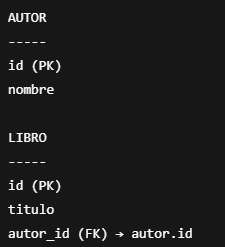

# **4. Tipos de relaciones usando PK y FK**

1️⃣ **Uno a muchos (la más común)**

- Un autor → muchos libros

- Un cliente → muchas órdenes

            autor (1) ────< libro (N)

2️⃣ **Uno a uno**

- Usuario → Perfil

            usuario (1) ──── (1) perfil

3️⃣ **Muchos a muchos (requiere tabla intermedia)**

Ejemplo: libros y categorías

            CREATE TABLE libro_categoria (
                libro_id INTEGER,
                categoria_id INTEGER,
                PRIMARY KEY (libro_id, categoria_id),
                FOREIGN KEY (libro_id) REFERENCES libro(id),
                FOREIGN KEY (categoria_id) REFERENCES categoria(id)
            );

# **5. Integridad referencial (muy importante)**

Las FK permiten definir qué pasa cuando se borra o actualiza el registro padre.

**Ejemplos:**

            FOREIGN KEY (autor_id)
            REFERENCES autor(id)
            ON DELETE CASCADE


- Si se borra el autor → se borran sus libros

            ON DELETE SET NULL


- Si se borra el autor → autor_id queda en NULL

            ON DELETE RESTRICT


- No permite borrar el autor si tiene libros

# **6. Errores comunes de principiantes**

❌ No usar Primary Key
❌ Usar datos “significativos” como PK (email, nombre)
❌ No activar claves foráneas en SQLite
❌ Crear FK sin índices (en bases grandes)

**En SQLite SIEMPRE debes hacer:**

            PRAGMA foreign_keys = ON;

# **7. Resumen corto**

|Concepto	|Qué hace|
|:-:|:-:|
|Primary Key|	Identifica un registro de forma única|
|Foreign Key|	Relaciona una tabla con otra|
|PK|	Única, no nula|
|FK|	Apunta a una PK|
|Objetivo|	Integridad y relaciones correctas|